<function matplotlib.pyplot.show(close=None, block=None)>

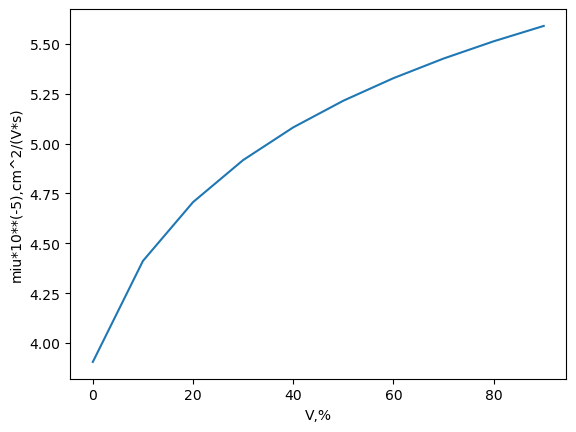

In [2]:
# случай: tcnm разбросm энергий и нет внешнего поля,нет перескока по диагонали ,3-мерный вариант
from math import exp, sqrt, log, e,pi
import random
import numpy as np 
import matplotlib.pyplot as plt
gamma = 10 ** 8  # int(input())
v0 = 10 ** 13  # int(input())
T = 298  # int(input())
F = 2.5 * 10 ** 7  # int(input())
z = 1.6 * 10 ** (-19)
a = 10 ** (-9)
k = 1.38 * 10 ** (-23)
sigma1 = 4*k*T
sigma2 = sigma1/3
gmax = 1/(sigma1**2*2*pi)
Emax = sigma1*sqrt(2*log(e,900000))
Emin= -Emax
# Нет разброса энергии и поля
vij0 = v0 * exp(-2 * gamma * a)
vij1 = vij0 * exp(-(z * F * a) / (k * T))
vij2 = vij0 * exp((z * F * a) / (k * T))

K = []
A = []
Sx=[]
Sy=[]
Sz=[]
MIU = []
n = 100 # int(input())#number of cycles
Lx = 50  # int(input())#the distance between the first and the last point
Ly = 100 #shirina
Lz = 100 #visota
pgs = 10
maxU = 0.0
minU = 1.0
SUM = 0
V=0
VO=[(V+0.1*i)*100 for i in range(10)]
M=[]
Et=-2*sigma1

def g(E0,Et): #distribution of energy
    return (1-V)/(sigma1*sqrt(2*pi))*exp(-0.5*(E0/sigma1)**2)+V/(sigma2*sqrt(2*pi))*exp(-0.5*((E0-Et)/sigma2)**2)      
gmax=g(0,Et)
d3=np.zeros((Ly,Lz,Lx+1))

def detE():#подбор энергии
    kop=1
    while kop>0:
        Ek =random.uniform(Emin, Emax)
        g1 =random.uniform(0, gmax)
        if g(Ek,Et)>g1:kop=0
        return Ek
    
def sgn(k):
    if k<=0:return 0
    else:return 1
#verification of Energy in the list    
def verE(j,k,i):
            if d3[j][k][i]!=0:      #for j in range(Ly):
               return d3[j][k][i]               #for k in range(Lz):
            else:                     #for i in range(Lx):
                return detE()

for i in range(10):
    
    for u in range(1, n + 1):  #основная структура
        x=0
        y=50
        z=50
       
        while x != Lx:
            
            
          
                        
                      
            # Генерация массива вероятностей
            B = []
            
            if (0 < x < Lx):

                    if (0 < y < Ly) and (0 < z < Lz):  # 1    n=6
                    #меняем везде d3 на verE(j,k,i)
                        d3[y+1][z][x]=verE(y+1,z,x)
                        d3[y][z][x+1]=verE(y,z,x+1)
                        d3[y][z+1][x]=verE(y,z+1,x)
                        d3[y-1][z][x]=verE(y-1,z,x)
                        d3[y][z-1][x]=verE(y,z-1,x)
                        d3[y][z][x-1]=verE(y,z,x-1)
                        vij0f=vij0*exp(-(d3[y+1][z][x]-d3[y][z][x])/(k*T)*sgn(d3[y+1][z][x]-d3[y][z][x]))
                        vij2g=vij2*exp(-(d3[y][z][x+1]-d3[y][z][x])/(k*T)*sgn(d3[y][z][x+1]-d3[y][z][x]))
                        vij0n=vij0*exp(-(d3[y][z+1][x]-d3[y][z][x])/(k*T)*sgn(d3[y][z+1][x]-d3[y][z][x]))#?
                        vij0h=vij0*exp(-(d3[y-1][z][x]-d3[y][z][x])/(k*T)*sgn(d3[y-1][z][x]-d3[y][z][x]))
                        vij0k=vij0*exp(-(d3[y][z-1][x]-d3[y][z][x])/(k*T)*sgn(d3[y][z-1][x]-d3[y][z][x]))
                        vij1p=vij1*exp(-(d3[y][z][x-1]-d3[y][z][x])/(k*T)*sgn(d3[y][z][x-1]-d3[y][z][x]))
                    
                        pij0 = vij0f / (vij0f +vij0n +vij0h + vij0k + vij1p + vij2g)
                        pij1 = vij0n / (vij0f +vij0n +vij0h + vij0k + vij1p + vij2g)
                        pij2 = vij0h / (vij0f +vij0n +vij0h + vij0k + vij1p + vij2g)
                        pij01 = vij0k / (vij0f +vij0n +vij0h + vij0k + vij1p + vij2g)
                        pij02 = vij2g / (vij0f +vij0n +vij0h + vij0k + vij1p + vij2g)
                        pij03 = vij1p / (vij0f +vij0n +vij0h + vij0k + vij1p + vij2g)
                     
                        B.append(pij1)
                        B.append(pij01)
                        B.append(pij02)
                        B.append(pij0)
                        B.append(pij2)
                        B.append(pij03)
                    
                    if (y == Ly or y == 0) and (z == Lz or z == 0):  # 2v n=4
                        if ((y ==0))and ((z==0)):
                            d3[y+1][z][x]=verE(y+1,z,x)
                            d3[y][z][x+1]=verE(y,z,x+1)
                            d3[y][z+1][x]=verE(y,z+1,x)
                            d3[y][z][x-1]=verE(y,z,x-1)
                            vij0f=vij0*exp(-(d3[y+1][z][x]-d3[y][z][x])/(k*T)*sgn(d3[y+1][z][x]-d3[y][z][x]))
                            vij2g=vij2*exp(-(d3[y][z][x+1]-d3[y][z][x])/(k*T)*sgn(d3[y][z][x+1]-d3[y][z][x]))
                            vij0n=vij0*exp(-(d3[y][z+1][x]-d3[y][z][x])/(k*T)*sgn(d3[y][z+1][x]-d3[y][z][x]))#?
                            vij1p=vij1*exp(-(d3[y][z][x-1]-d3[y][z][x])/(k*T)*sgn(d3[y][z][x+1]-d3[y][z][x]))
                        if ((y ==Ly))and ((z==Lz)):
                            d3[y-1][z][x]=verE(y-1,z,x)
                            d3[y][z][x+1]=verE(y,z,x+1)
                            d3[y][z-1][x]=verE(y,z-1,x)
                            d3[y][z][x-1]=verE(y,z,x-1)
                            vij0f=vij0*exp(-(d3[y-1][z][x]-d3[y][z][x])/(k*T)*sgn(d3[y-1][z][x]-d3[y][z][x]))
                            vij2g=vij2*exp(-(d3[y][z][x+1]-d3[y][z][x])/(k*T)*sgn(d3[y][z][x+1]-d3[y][z][x]))
                            vij0n=vij0*exp(-(d3[y][z-1][x]-d3[y][z][x])/(k*T)*sgn(d3[y][z-1][x]-d3[y][z][x]))#?
                            vij1p=vij1*exp(-(d3[y][z][x-1]-d3[y][z][x])/(k*T)*sgn(d3[y][z][x-1]-d3[y][z][x]))
                        if ((y ==0))and ((z==Lz)):
                            d3[y+1][z][x]=verE(y+1,z,x)
                            d3[y][z][x+1]=verE(y,z,x+1)
                            d3[y][z-1][x]=verE(y,z-1,x)
                            d3[y][z][x-1]=verE(y,z,x-1)
                            vij0f=vij0*exp(-(d3[y+1][z][x]-d3[y][z][x])/(k*T)*sgn(d3[y+1][z][x]-d3[y][z][x]))
                            vij2g=vij2*exp(-(d3[y][z][x+1]-d3[y][z][x])/(k*T)*sgn(d3[y][z][x+1]-d3[y][z][x]))
                            vij0n=vij0*exp(-(d3[y][z-1][x]-d3[y][z][x])/(k*T)*sgn(d3[y][z-1][x]-d3[y][z][x]))#?
                            vij1p=vij1*exp(-(d3[y][z][x-1]-d3[y][z][x])/(k*T)*sgn(d3[y][z][x-1]-d3[y][z][x]))
                        if ((y ==Ly))and ((z==0)):
                            d3[y-1][z][x]=verE(y-1,z,x)
                            d3[y][z][x+1]=verE(y,z,x+1)
                            d3[y][z+1][x]=verE(y,z+1,x)
                            d3[y][z][x-1]=verE(y,z,x-1)
                            vij0f=vij0*exp(-(d3[y-1][z][x]-d3[y][z][x])/(k*T)*sgn(d3[y-1][z][x]-d3[y][z][x]))
                            vij2g=vij2*exp(-(d3[y][z][x+1]-d3[y][z][x])/(k*T)*sgn(d3[y][z][x+1]-d3[y][z][x]))
                            vij0n=vij0*exp(-(d3[y][z+1][x]-d3[y][z][x])/(k*T)*sgn(d3[y][z+1][x]-d3[y][z][x]))
                            vij1p=vij1*exp(-(d3[y][z][x-1]-d3[y][z][x])/(k*T)*sgn(d3[y][z][x-1]-d3[y][z][x]))
                        pij2 = vij2g / (vij0n +vij0f + vij1p + vij2g)
                        pij0 = vij0f / (vij0n +vij0f + vij1p + vij2g)
                        pij01 = vij0n / (vij0n +vij0f + vij1p + vij2g)
                        pij1 = vij1p / (vij0n +vij0f + vij1p + vij2g)
                        B.append(pij1)
                        B.append(pij0)
                        B.append(pij2)
                        B.append(pij01)
                    
                    if (y != Ly or y != 0) and (z == Lz or z == 0):#n=5
                        if (z==0):
                            d3[y+1][z][x]=verE(y+1,z,x)
                            d3[y][z][x+1]=verE(y,z,x+1)
                            d3[y][z+1][x]=verE(y,z+1,x)
                            d3[y-1][z][x]=verE(y-1,z,x)
                            d3[y][z][x-1]=verE(y,z,x-1)
                            vij0f=vij0*exp(-(d3[y+1][z][x]-d3[y][z][x])/(k*T)*sgn(d3[y+1][z][x]-d3[y][z][x]))
                            vij2g=vij2*exp(-(d3[y][z][x+1]-d3[y][z][x])/(k*T)*sgn(d3[y][z][x+1]-d3[y][z][x]))
                            vij0n=vij0*exp(-(d3[y][z+1][x]-d3[y][z][x])/(k*T)*sgn(d3[y][z+1][x]-d3[y][z][x]))#?
                            vij0h=vij0*exp(-(d3[y-1][z][x]-d3[y][z][x])/(k*T)*sgn(d3[y-1][z][x]-d3[y][z][x]))
                            vij1p=vij1*exp(-(d3[y][z][x-1]-d3[y][z][x])/(k*T)*sgn(d3[y][z][x-1]-d3[y][z][x]))
                        if (z ==Lz):
                          d3[y+1][z][x]=verE(y+1,z,x)
                          d3[y][z][x+1]=verE(y,z,x+1)
                          d3[y-1][z][x]=verE(y-1,z,x)
                          d3[y][z-1][x]=verE(y,z-1,x)
                          d3[y][z][x-1]=verE(y,z,x-1)
                          vij0f=vij0*exp(-(d3[y+1][z][x]-d3[y][z][x])/(k*T)*sgn(d3[y+1][z][x]-d3[y][z][x]))
                          vij2g=vij2*exp(-(d3[y][z][x+1]-d3[y][z][x])/(k*T)*sgn(d3[y][z][x+1]-d3[y][z][x]))
                          vij0n=vij0*exp(-(d3[y][z-1][x]-d3[y][z][x])/(k*T)*sgn(d3[y][z-1][x]-d3[y][z][x]))
                          vij0h=vij0*exp(-(d3[y-1][z][x]-d3[y][z][x])/(k*T)*sgn(d3[y-1][z][x]-d3[y][z][x]))
                          vij1p=vij1*exp(-(d3[y][z][x-1]-d3[y][z][x])/(k*T)*sgn(d3[y][z][x-1]-d3[y][z][x]))
                        pij2 = vij2g / (vij0n+vij0f+vij0h + vij2g + vij1p)
                        pij0 = vij0n / (vij0n+vij0f+vij0h + vij2g + vij1p)
                        pij1 = vij1p / (vij0n+vij0f+vij0h + vij2g + vij1p)
                        pij01 = vij0h/(vij0n+vij0f+vij0h + vij2g + vij1p)
                        pij02 = vij0f/ (vij0n+vij0f+vij0h + vij2g + vij1p)
                        B.append(pij1)
                        B.append(pij01)
                        B.append(pij0)
                        B.append(pij2)
                        B.append(pij2)
                    if (y == Ly or y == 0) and (z != Lz or z != 0):  # 3b n=5
                        if (y ==0):
                          d3[y+1][z][x]=verE(y+1,z,x)
                          d3[y][z][x+1]=verE(y,z,x+1)
                          d3[y][z+1][x]=verE(y,z+1,x)
                          d3[y][z-1][x]=verE(y,z-1,x)
                          d3[y][z][x-1]=verE(y,z,x-1)
                          vij0f=vij0*exp(-(d3[y+1][z][x]-d3[y][z][x])/(k*T)*sgn(d3[y+1][z][x]-d3[y][z][x]))
                          vij2g=vij2*exp(-(d3[y][z][x+1]-d3[y][z][x])/(k*T)*sgn(d3[y][z][x+1]-d3[y][z][x]))
                          vij0n=vij0*exp(-(d3[y][z+1][x]-d3[y][z][x])/(k*T)*sgn(d3[y][z+1][x]-d3[y][z][x]))#?
                          vij0h=vij0*exp(-(d3[y][z-1][x]-d3[y][z][x])/(k*T)*sgn(d3[y][z-1][x]-d3[y][z][x]))
                          vij1p=vij1*exp(-(d3[y][z][x-1]-d3[y][z][x])/(k*T)*sgn(d3[y][z][x-1]-d3[y][z][x]))
                        if (y ==Ly):
                          d3[y][z][x+1]=verE(y,z,x+1)
                          d3[y][z+1][x]=verE(y,z+1,x)
                          d3[y-1][z][x]=verE(y-1,z,x)
                          d3[y][z-1][x]=verE(y,z-1,x)
                          d3[y][z][x-1]=verE(y,z,x-1)
                          vij0f=vij0*exp(-(d3[y-1][z][x]-d3[y][z][x])/(k*T)*sgn(d3[y-1][z][x]-d3[y][z][x]))
                          vij2g=vij2*exp(-(d3[y][z][x+1]-d3[y][z][x])/(k*T)*sgn(d3[y][z][x+1]-d3[y][z][x]))
                          vij0n=vij0*exp(-(d3[y][z+1][x]-d3[y][z][x])/(k*T)*sgn(d3[y][z+1][x]-d3[y][z][x]))
                          vij0h=vij0*exp(-(d3[y][z-1][x]-d3[y][z][x])/(k*T)*sgn(d3[y][z-1][x]-d3[y][z][x]))
                          vij1p=vij1*exp(-(d3[y][z][x-1]-d3[y][z][x])/(k*T)*sgn(d3[y][z][x-1]-d3[y][z][x]))
                        pij2 = vij2g / (3 * vij0 + vij1 + vij2)
                        pij0 = vij0f / (3 * vij0 + vij1 + vij2)
                        pij1 = vij1p / (3 * vij0 + vij1 + vij2)
                        pij01 =vij0h/(3 * vij0 + vij2 + vij1)
                        pij02 =vij0n/(3 * vij0 + vij2 + vij1)
                        B.append(pij1)
                        B.append(pij01)
                        B.append(pij0)
                        B.append(pij2)
                        B.append(pij02)




            elif (x == 0):

                
                if (y == Ly or y == 0) and (z == Lz or z == 0):  # 2  n=3
                    if ((y ==0))and ((z==0)):
                            
                          d3[y+1][z][x]=verE(y+1,z,x)
                          d3[y][z][x+1]=verE(y,z,x+1)
                          d3[y][z+1][x]=verE(y,z+1,x)
                          
                     
                          vij0f=vij0*exp(-(d3[y+1][z][x]-d3[y][z][x])/(k*T)*sgn(d3[y+1][z][x]-d3[y][z][x]))
                          vij2g=vij2*exp(-(d3[y][z][x+1]-d3[y][z][x])/(k*T)*sgn(d3[y][z][x+1]-d3[y][z][x]))
                          vij0n=vij0*exp(-(d3[y][z+1][x]-d3[y][z][x])/(k*T)*sgn(d3[y][z+1][x]-d3[y][z][x]))#?
                    if ((y ==Ly))and ((z==Lz)):
                         
                          d3[y][z][x+1]=verE(y,z,x+1)
                         
                          d3[y-1][z][x]=verE(y-1,z,x)
                          d3[y][z-1][x]=verE(y,z-1,x)
                          vij0f=vij0*exp(-(d3[y-1][z][x]-d3[y][z][x])/(k*T)*sgn(d3[y-1][z][x]-d3[y][z][x]))
                          vij2g=vij2*exp(-(d3[y][z][x+1]-d3[y][z][x])/(k*T)*sgn(d3[y][z][x+1]-d3[y][z][x]))
                          vij0n=vij0*exp(-(d3[y][z-1][x]-d3[y][z][x])/(k*T)*sgn(d3[y][z-1][x]-d3[y][z][x]))
                    if ((y ==0))and ((z==Lz)):
                            d3[y+1][z][x]=verE(y+1,z,x)
                            d3[y][z][x+1]=verE(y,z,x+1)
                            d3[y][z-1][x]=verE(y,z-1,x)
                            vij0f=vij0*exp(-(d3[y+1][z][x]-d3[y][z][x])/(k*T)*sgn(d3[y+1][z][x]-d3[y][z][x]))
                            vij2g=vij2*exp(-(d3[y][z][x+1]-d3[y][z][x])/(k*T)*sgn(d3[y][z][x+1]-d3[y][z][x]))
                            vij0n=vij0*exp(-(d3[y][z-1][x]-d3[y][z][x])/(k*T)*sgn(d3[y][z-1][x]-d3[y][z][x]))#?
                    if ((y ==Ly))and ((z==0)):
                         
                            d3[y-1][z][x]=verE(y-1,z,x)
                            d3[y][z+1][x]=verE(y,z+1,x)
                            d3[y][z][x+1]=verE(y,z,x+1)
                            vij0f=vij0*exp(-(d3[y-1][z][x]-d3[y][z][x])/(k*T)*sgn(d3[y-1][z][x]-d3[y][z][x]))
                            vij2g=vij2*exp(-(d3[y][z][x+1]-d3[y][z][x])/(k*T)*sgn(d3[y][z][x+1]-d3[y][z][x]))
                            vij0n=vij0*exp(-(d3[y][z+1][x]-d3[y][z][x])/(k*T)*sgn(d3[y][z+1][x]-d3[y][z][x]))
                    pij2 = vij2g / (vij0n + vij0f + vij2g)
                    pij0 = vij0f / (vij0n + vij0f + vij2g)
                    pij01 = vij0n / (vij0n + vij0f + vij2g)
                    B.append(pij1)
                    B.append(pij2)
                    B.append(pij1)
                    
                if (y == Ly or y == 0) and (z != Lz or z != 0):  # 2b   n=4
                    if (y ==0):
                          d3[y+1][z][x]=verE(y+1,z,x)
                          d3[y][z][x+1]=verE(y,z,x+1)
                          d3[y][z+1][x]=verE(y,z+1,x)
                         
                          d3[y][z-1][x]=verE(y,z-1,x)
                          vij0f=vij0*exp(-(d3[y+1][z][x]-d3[y][z][x])/(k*T)*sgn(d3[y+1][z][x]-d3[y][z][x]))
                          vij2g=vij2*exp(-(d3[y][z][x+1]-d3[y][z][x])/(k*T)*sgn(d3[y][z][x+1]-d3[y][z][x]))
                          vij0n=vij0*exp(-(d3[y][z+1][x]-d3[y][z][x])/(k*T)*sgn(d3[y][z+1][x]-d3[y][z][x]))#?
                          vij0h=vij0*exp(-(d3[y][z-1][x]-d3[y][z][x])/(k*T)*sgn(d3[y][z-1][x]-d3[y][z][x]))
                    if (y ==Ly):
                          
                          d3[y][z][x+1]=verE(y,z,x+1)
                          d3[y][z+1][x]=verE(y,z+1,x)
                          d3[y-1][z][x]=verE(y-1,z,x)
                          d3[y][z-1][x]=verE(y,z-1,x)
                          vij0f=vij0*exp(-(d3[y-1][z][x]-d3[y][z][x])/(k*T)*sgn(d3[y-1][z][x]-d3[y][z][x]))
                          vij2g=vij2*exp(-(d3[y][z][x+1]-d3[y][z][x])/(k*T)*sgn(d3[y][z][x+1]-d3[y][z][x]))
                          vij0n=vij0*exp(-(d3[y][z+1][x]-d3[y][z][x])/(k*T)*sgn(d3[y][z+1][x]-d3[y][z][x]))
                          vij0h=vij0*exp(-(d3[y][z-1][x]-d3[y][z][x])/(k*T)*sgn(d3[y][z-1][x]-d3[y][z][x]))
                    pij2 = vij2g / (vij0f +vij0n+ vij0h + vij2g)
                    pij0 = vij0n / (vij0f +vij0n +vij0h + vij2g)
                    pij20 = vij0f /(vij0f +vij0n+vij0h + vij2g)
                    pij01 = vij0h / (vij0n + vij0f+vij0h + vij2g)
                    B.append(pij20)
                    B.append(pij0)
                    B.append(pij2)
                    B.append(pij01)
                if (y != Ly or y != 0) and (z != Lz or z != 0):  # n=5
                     d3[y+1][z][x]=verE(y+1,z,x)
                     d3[y][z][x+1]=verE(y,z,x+1)
                     d3[y][z+1][x]=verE(y,z+1,x)
                     d3[y-1][z][x]=verE(y-1,z,x)
                     d3[y][z-1][x]=verE(y,z-1,x)
                     vij0f=vij0*exp(-(d3[y+1][z][x]-d3[y][z][x])/(k*T)*sgn(d3[y+1][z][x]-d3[y][z][x]))
                     vij2g=vij2*exp(-(d3[y][z][x+1]-d3[y][z][x])/(k*T)*sgn(d3[y][z][x+1]-d3[y][z][x]))
                     vij0n=vij0*exp(-(d3[y][z+1][x]-d3[y][z][x])/(k*T)*sgn(d3[y][z+1][x]-d3[y][z][x]))#?
                     vij0h=vij0*exp(-(d3[y-1][z][x]-d3[y][z][x])/(k*T)*sgn(d3[y-1][z][x]-d3[y][z][x]))
                     vij0k=vij0*exp(-(d3[y][z-1][x]-d3[y][z][x])/(k*T)*sgn(d3[y][z-1][x]-d3[y][z][x]))
                     pij2 = vij2g / (vij0f +vij0n +vij0h +vij0k + vij2g)
                     pij0 = vij0f / (vij0f +vij0n +vij0h +vij0k + vij2g)
                     pij01 = vij0n / (vij0f +vij0n +vij0h +vij0k + vij2g)
                     pij201 = vij0h / (vij0f +vij0n +vij0h +vij0k + vij2g)
                     pij202 = vij0k / (vij0f +vij0n +vij0h +vij0k + vij2g)
                     B.append(pij201)
                     B.append(pij202)
                     B.append(pij0)
                     B.append(pij2)
                     B.append(pij01)
                    
                if ((y != Ly or y != 0) and (z == Lz or z == 0)):  # n=4
                    if (z==0):
                   
                          d3[y+1][z][x]=verE(y+1,z,x)
                          d3[y][z][x+1]=verE(y,z,x+1)
                          d3[y][z+1][x]=verE(y,z+1,x)
                          d3[y-1][z][x]=verE(y-1,z,x)
                          
                          vij0f=vij0*exp(-(d3[y+1][z][x]-d3[y][z][x])/(k*T)*sgn(d3[y+1][z][x]-d3[y][z][x]))
                          vij2g=vij2*exp(-(d3[y][z][x+1]-d3[y][z][x])/(k*T)*sgn(d3[y][z][x+1]-d3[y][z][x]))
                          vij0n=vij0*exp(-(d3[y][z+1][x]-d3[y][z][x])/(k*T)*sgn(d3[y][z+1][x]-d3[y][z][x]))#?
                          vij0h=vij0*exp(-(d3[y-1][z][x]-d3[y][z][x])/(k*T)*sgn(d3[y-1][z][x]-d3[y][z][x]))
                    if (z ==Lz):
                          d3[y+1][z][x]=verE(y+1,z,x)
                          d3[y][z][x+1]=verE(y,z,x+1)
                          d3[y-1][z][x]=verE(y-1,z,x)
                          d3[y][z-1][x]=verE(y,z-1,x)
                          vij0f=vij0*exp(-(d3[y+1][z][x]-d3[y][z][x])/(k*T)*sgn(d3[y+1][z][x]-d3[y][z][x]))
                          vij2g=vij2*exp(-(d3[y][z][x+1]-d3[y][z][x])/(k*T)*sgn(d3[y][z][x+1]-d3[y][z][x]))
                          vij0n=vij0*exp(-(d3[y][z-1][x]-d3[y][z][x])/(k*T)*sgn(d3[y][z-1][x]-d3[y][z][x]))
                          vij0h=vij0*exp(-(d3[y-1][z][x]-d3[y][z][x])/(k*T)*sgn(d3[y-1][z][x]-d3[y][z][x]))
                    pij2 = vij2g / (vij0f +vij0n +vij0h + vij2g)
                    pij0 = vij0f / (vij0f +vij0n +vij0h + vij2g)
                    pij20 =vij0n / (vij0f +vij0n +vij0h + vij2g)
                    pij01 =vij0h / (vij0f +vij0n +vij0h + vij2g)
                    B.append(pij20)
                    B.append(pij0)
                    B.append(pij2)
                    B.append(pij01)
                          
            N = len(B)    
            B.sort()
            pos = random.random()
            

            # Время ожидания
            if N == 6: 
                w = vij0f +vij0n +vij0h + vij0k + vij1p + vij2g
               
            if N == 5:
                if x !=0 :
                    w = vij0f +vij0n +vij0h + vij1p + vij2g
                if x==0:
                    w = vij0f +vij0n +vij0h +vij0k + vij2g 
                  
            
            if N == 4:
                if x == 1 :
                    w = vij0f +vij0n +vij0h + vij2g
                else:
                    w=vij0n +vij0f + vij1p + vij2g 
                print(5)
            if N == 3:
                    w =vij0n + vij0f + vij2g
              
            # для лучшего варианта - подпрограмма пересчета вероятности
            pu = random.random()
            t = log(1 / pu, e) * w ** (-1)
            A.append(t)
            
            # print(pos)
            # print(B)
            # print(y,x)
            # Выбор места прыжка
  
            if N == 6:
                
                if (pos <= B[1]): x -= 1
                if (B[1] < pos <= B[2]): z -= 1
                if (B[2] < pos <= B[3]): z += 1
                if (B[3] < pos <= B[4]): y -= 1
                if (B[4] < pos <= B[5]): y += 1
                if (pos > B[5]): x += 1

            if N == 5:
                
                if x == 0 or x == Lx:
                    if (pos <= B[1]): z -= 1
                    if (B[1] < pos <= B[2]): z += 1
                    if (B[2] < pos <= B[3]): y -= 1
                    if (B[3] < pos <= B[4]): y += 1
                    if (pos > B[4]): x += 1
                else:
                    if (y == Ly or y == 0) and (z != Lz or z != 0):
                        if (pos <= B[1]): x -= 1
                        if (B[1] < pos <= B[2]): z -= 1
                        if (B[2] < pos <= B[3]): z += 1
                        if (B[3] < pos <= B[4]):
                            if y < Ly:
                                y += 1
                            else:
                                y -= 1
                        if (pos > B[4]): x += 1
                    if (y != Ly or y != 0) and (z == Lz or z == 0):
                        if (pos <= B[1]): x -= 1
                        if (B[1] < pos <= B[2]):
                            if z < Lz:
                                z += 1
                            else:
                                z -= 1
                        if (B[2] < pos <= B[3]): y -= 1
                        if (B[3] < pos <= B[4]): y += 1
                        if (pos > B[4]): x += 1

            if N == 4:
               
                if (0 < x < Lx):
                    if (pos <= B[1]): x -= 1
                    if (B[1] < pos <= B[2]):
                        if (z == Lz):
                            z -= 1
                        else:
                            z += 1
                    if (B[2] < pos <= B[3]):
                        if y == Ly:
                            y -= 1
                        else:
                            y += 1
                    if (pos > B[3]): x += 1

                if (x == Lx or x == 0):
                    if (y == Ly or y == 0):
                        if (pos <= B[1]): z -= 1
                        if (B[1] < pos <= B[2]): z += 1
                        if (B[2] < pos <= B[3]):
                            if y == Ly:
                                y -= 1
                            else:
                                y += 1
                        if (pos > B[3]): x += 1
                    else:
                        if (pos <= B[1]):
                            if z == Lz:
                                z -= 1
                            else:
                                z += 1
                        if (B[1] < pos <= B[2]): y -= 1
                        if (B[2] < pos <= B[3]): y += 1
                        if (pos > B[2]): x += 1
            if N == 3:
               
                if (pos <= B[1]):
                    if z == Lz:
                        z -= 1
                    else:
                        z += 1
                if (B[1] < pos <= B[2]):
                    if y == Ly:
                        y -= 1
                    else:
                        y += 1
                if (pos > B[2]): 
                    x += 1
            
            
        s = 0  # Суммарное время прохода
        for i in range(len(A)):
            s += A[i]
        K.append(s)
        

    Tj = 0
    for j in range(len(K)): Tj += 1 / (n * K[j])
    miu = Tj * Lx / F * 10 ** (-9)*10**5
    M.append(miu)   
    
   
#Plotting
plt.plot(VO,M)
plt.xlabel("V,%")
plt.ylabel("miu*10**(-5),cm^2/(V*s)")
plt.show

